In [40]:
%matplotlib inline

import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pprint import pprint

plt.rcParams['figure.figsize'] = 12, 7

In [83]:
joined = pd.read_csv("../data/peps_to_post.csv")
Y = joined['DRate 1']
joined = joined.drop(['DRate 1', 'UNITID'], axis = 1)

to_dummify = ['INSTCAT', 'Prog\nLength', 'HLOFFER', 'School\nType', 'GROFFER', 'LOCALE', 'SECTOR']

for category in to_dummify:
    joined = pd.concat([joined, pd.get_dummies(joined[category], prefix="{}_".format(category))], axis = 1)
    joined = joined.drop(category, axis = 1)

In [84]:
from sklearn import tree
from sklearn import ensemble

target = 'DRate_Transformed'

# Isolate training and testing data frames on 80/20 split
train_df = joined.sample(frac = 0.80, replace = False)
test_df = joined.drop(train_df.index)

# Split each into training and testing data frames
train_X, train_y = train_df.drop(target, axis = 1), train_df[target]
test_X, test_y = test_df.drop(target, axis = 1), test_df[target]

# Initialize classifier.
classifier = ensemble.RandomForestClassifier()
# classifier = tree.DecisionTreeClassifier(criterion = 'entropy')
classifier = classifier.fit(train_X, train_y)

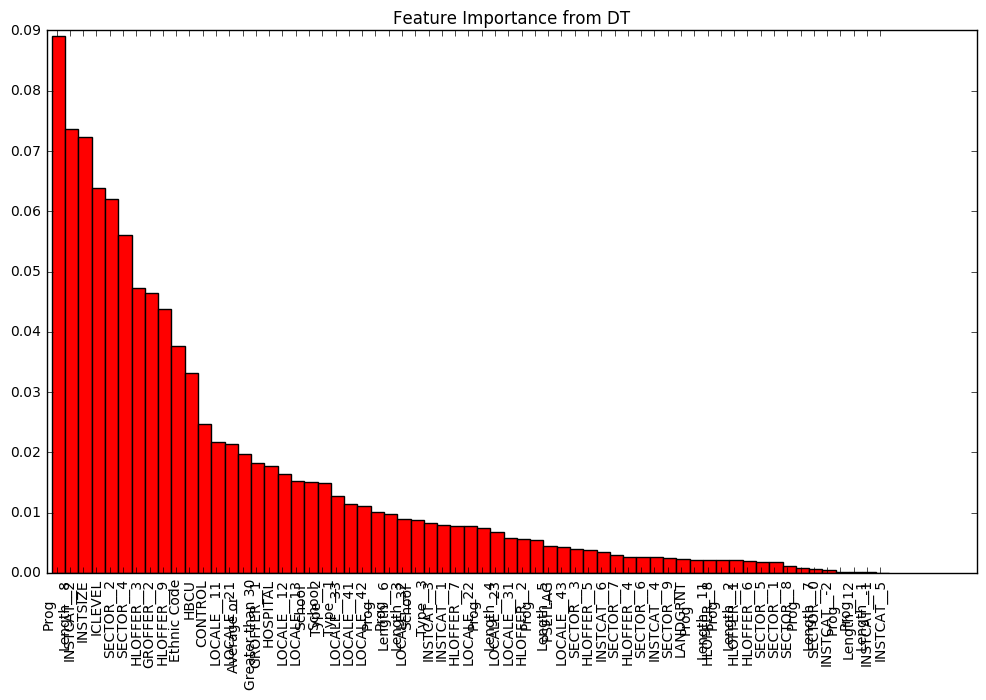

In [85]:
# Sort our classifier's feature importance vector
indices = np.argsort(classifier.feature_importances_)[::-1]

# Plot our features in order of importance to our decision tree classifier
fig, ax = plt.subplots()
width = 1
ax.bar(0.4 + np.arange(len(classifier.feature_importances_)), sorted(classifier.feature_importances_, reverse = True), width, color = 'r')
ax.set_xticks(0.75 + np.arange(len(classifier.feature_importances_)))
ax.set_xticklabels([train_X.columns[i] for i in indices], rotation = 90)
plt.title('Feature Importance from DT')
plt.savefig("feature_importance.png", bbox_inches = 'tight')

In [88]:
indices = np.argsort(classifier.feature_importances_)[::-1]
sorted({train_X.columns[i]: i for i in indices})

['Average or\nGreater than 30',
 'CONTROL',
 'Ethnic Code',
 'GROFFER__1',
 'GROFFER__2',
 'HBCU',
 'HLOFFER__1',
 'HLOFFER__2',
 'HLOFFER__3',
 'HLOFFER__4',
 'HLOFFER__5',
 'HLOFFER__6',
 'HLOFFER__7',
 'HLOFFER__8',
 'HLOFFER__9',
 'HOSPITAL',
 'ICLEVEL',
 'INSTCAT__-1',
 'INSTCAT__-2',
 'INSTCAT__1',
 'INSTCAT__2',
 'INSTCAT__3',
 'INSTCAT__4',
 'INSTCAT__5',
 'INSTCAT__6',
 'INSTSIZE',
 'LANDGRNT',
 'LOCALE__11',
 'LOCALE__12',
 'LOCALE__13',
 'LOCALE__21',
 'LOCALE__22',
 'LOCALE__23',
 'LOCALE__31',
 'LOCALE__32',
 'LOCALE__33',
 'LOCALE__41',
 'LOCALE__42',
 'LOCALE__43',
 'PSEFLAG',
 'Prog\nLength__1',
 'Prog\nLength__11',
 'Prog\nLength__12',
 'Prog\nLength__2',
 'Prog\nLength__3',
 'Prog\nLength__4',
 'Prog\nLength__5',
 'Prog\nLength__6',
 'Prog\nLength__7',
 'Prog\nLength__8',
 'SECTOR__0',
 'SECTOR__1',
 'SECTOR__2',
 'SECTOR__3',
 'SECTOR__4',
 'SECTOR__5',
 'SECTOR__6',
 'SECTOR__7',
 'SECTOR__8',
 'SECTOR__9',
 'School\nType__1',
 'School\nType__2',
 'School\nType__3']

In [ ]:
# Predict churndep on both the train_df and test_df datasets
test_accuracy = classifier.score(test_X, test_y)
train_accuracy = classifier.score(train_X, train_y)

print("Prediction accuracy on testing dataset: {:>.4}%".format(test_accuracy * 100))
print("Prediction accuracy on training dataset: {:>.4}%".format(train_accuracy * 100))

classifier.score

In [ ]:
########## NOTE ##########
# This won't work because we have NaN values in our master dataset.
# Please see Data-Processing.ipynb for the details.

master = pd.read_csv("../data/master.csv")

target = 'DRate_Transformed'

# Isolate training and testing data frames on 80/20 split
train_df = master.sample(frac = 0.80, replace = False)
test_df = master.drop(train_df.index)

# Split each into training and testing data frames
train_X, train_y = train_df.drop(target, axis = 1), train_df[target]
test_X, test_y = test_df.drop(target, axis = 1), test_df[target]

# Initialize classifier.
classifier = tree.DecisionTreeClassifier(criterion = 'entropy')
classifier = classifier.fit(train_X, train_y)

In [ ]:
# Sort our classifier's feature importance vector
indices = np.argsort(classifier.feature_importances_)[::-1]

# Plot our features in order of importance to our decision tree classifier
fig, ax = plt.subplots()
width = 0.7
ax.bar(0.4 + np.arange(len(classifier.feature_importances_)), sorted(classifier.feature_importances_, reverse = True), width, color = 'r')
ax.set_xticks(0.75 + np.arange(len(classifier.feature_importances_)))
ax.set_xticklabels([train_X.columns[i] for i in indices], rotation = 90)
plt.title('Feature Importance from DT')
plt.savefig("feature_importance.png", bbox_inches = 'tight')

In [ ]:
import statsmodels.stats.api as sms

